In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
consumer=pd.read_csv('../data/Consumer_Complaints.csv')

In [3]:
consumer.head(3)

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,03/12/2014,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,M&T BANK CORPORATION,MI,48382,NaN,NaN,Referral,03/17/2014,Closed with explanation,Yes,No,759217
1,01/19/2017,Student loan,Federal student loan servicing,Dealing with my lender or servicer,Received bad information about my loan,When my loan was switched over to Navient i wa...,NaN,"Navient Solutions, LLC.",LA,NaN,NaN,Consent provided,Web,01/19/2017,Closed with explanation,Yes,No,2296496
2,04/06/2018,Credit card or prepaid card,General-purpose credit card or charge card,"Other features, terms, or problems",Other problem,I tried to sign up for a spending monitoring p...,NaN,CAPITAL ONE FINANCIAL CORPORATION,VA,NaN,Older American,Consent provided,Web,04/06/2018,Closed with explanation,Yes,NaN,2866101


In [4]:
consumer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1180790 entries, 0 to 1180789
Data columns (total 18 columns):
Date received                   1180790 non-null object
Product                         1180790 non-null object
Sub-product                     945624 non-null object
Issue                           1180790 non-null object
Sub-issue                       663029 non-null object
Consumer complaint narrative    349610 non-null object
Company public response         397855 non-null object
Company                         1180790 non-null object
State                           1164468 non-null object
ZIP code                        1086963 non-null object
Tags                            161380 non-null object
Consumer consent provided?      619516 non-null object
Submitted via                   1180790 non-null object
Date sent to company            1180790 non-null object
Company response to consumer    1180784 non-null object
Timely response?                1180790 non-null obje

In [5]:
consumer.Product.unique()

array(['Mortgage', 'Student loan', 'Credit card or prepaid card',
       'Credit card', 'Debt collection', 'Credit reporting',
       'Credit reporting, credit repair services, or other personal consumer reports',
       'Bank account or service', 'Consumer Loan', 'Money transfers',
       'Vehicle loan or lease',
       'Money transfer, virtual currency, or money service',
       'Checking or savings account', 'Payday loan',
       'Payday loan, title loan, or personal loan',
       'Other financial service', 'Prepaid card', 'Virtual currency'],
      dtype=object)

In [6]:
## Total Product categories are 18
len(consumer.Product.unique())

18

## Checking the Product categories (Not null)

In [7]:
consumer.groupby('Product').count()

,Date received,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
Product,,,,,,,,,,,,,,,,,
Bank account or service,86206,86206,86206,0,14885,24084,86206,84650,81471,11826,24027,86206,86206,86206,86206,86206,86206
Checking or savings account,32370,32370,32370,32356,10693,18061,32370,30475,28223,3357,15875,32370,32370,32370,32370,3,32370
Consumer Loan,31605,31605,31605,0,9473,7751,31605,31424,29240,5224,15391,31605,31605,31605,31605,31605,31605
Credit card,89190,0,89190,0,18838,20898,89190,88476,84104,13505,31993,89190,89190,89190,89190,89190,89190
Credit card or prepaid card,37957,37957,37957,37572,17950,18532,37957,36781,32556,5687,27227,37957,37957,37957,37957,0,37957
Credit reporting,140432,0,140432,140432,31588,54608,140432,139959,133579,17396,69666,140432,140432,140432,140432,140432,140432
"Credit reporting, credit repair services, or other personal consumer reports",178573,178573,178573,173918,78119,100573,178573,175978,160160,21520,150527,178573,178573,178570,178573,0,178573
Debt collection,226702,226702,226702,226702,79659,71708,226702,224355,207041,33860,139495,226702,226702,226700,226702,145850,226702
"Money transfer, virtual currency, or money service",8393,8393,8393,0,4726,1860,8393,7376,6406,935,6913,8393,8393,8393,8393,0,8393


In [8]:
consumer.isnull().groupby('Product').transform('sum').head()

,Date received,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,False,235166.0,False,517761.0,831180.0,782935.0,False,16322.0,93827.0,1019410.0,561274.0,False,False,6.0,False,412264.0,False
1,False,235166.0,False,517761.0,831180.0,782935.0,False,16322.0,93827.0,1019410.0,561274.0,False,False,6.0,False,412264.0,False
2,False,235166.0,False,517761.0,831180.0,782935.0,False,16322.0,93827.0,1019410.0,561274.0,False,False,6.0,False,412264.0,False
3,False,235166.0,False,517761.0,831180.0,782935.0,False,16322.0,93827.0,1019410.0,561274.0,False,False,6.0,False,412264.0,False
4,False,235166.0,False,517761.0,831180.0,782935.0,False,16322.0,93827.0,1019410.0,561274.0,False,False,6.0,False,412264.0,False


In [9]:
consumer=consumer[['Product','Consumer complaint narrative']]

In [10]:
consumer.columns=['Product', 'Consumer_Complaint']

In [11]:
consumer.head()


,Product,Consumer_Complaint
0,Mortgage,NaN
1,Student loan,When my loan was switched over to Navient i wa...
2,Credit card or prepaid card,I tried to sign up for a spending monitoring p...
3,Credit card,NaN
4,Debt collection,NaN


In [12]:
consumer.groupby('Product').count()

,Consumer_Complaint
Product,
Bank account or service,14885
Checking or savings account,10693
Consumer Loan,9473
Credit card,18838
Credit card or prepaid card,17950
Credit reporting,31588
"Credit reporting, credit repair services, or other personal consumer reports",78119
Debt collection,79659
"Money transfer, virtual currency, or money service",4726


In [13]:
consumer=consumer.dropna(subset=['Consumer_Complaint'])

In [14]:
consumer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 349610 entries, 1 to 1180789
Data columns (total 2 columns):
Product               349610 non-null object
Consumer_Complaint    349610 non-null object
dtypes: object(2)
memory usage: 8.0+ MB


In [15]:
consumer.Product=consumer.Product.astype('category', overwrite=True)
consumer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 349610 entries, 1 to 1180789
Data columns (total 2 columns):
Product               349610 non-null category
Consumer_Complaint    349610 non-null object
dtypes: category(1), object(1)
memory usage: 5.7+ MB


## Converting the factors to numerical values

In [16]:
consumer.Product.cat.codes.unique()

array([15,  4, 10,  5,  6,  7, 16,  8,  1, 13,  2,  0,  3,  9, 14, 12, 11,
       17], dtype=int64)

In [17]:
consumer['Product_id']=consumer.Product.cat.codes;

In [18]:
consumer.head()

,Product,Consumer_Complaint,Product_id
1,Student loan,When my loan was switched over to Navient i wa...,15
2,Credit card or prepaid card,I tried to sign up for a spending monitoring p...,4
7,Mortgage,"My mortgage is with BB & T Bank, recently I ha...",10
13,Mortgage,The entire lending experience with Citizens Ba...,10
14,Credit reporting,My credit score has gone down XXXX points in t...,5


In [19]:
consumer.Product_id.astype('category', overwrite=True);

In [20]:
consumer.head()

,Product,Consumer_Complaint,Product_id
1,Student loan,When my loan was switched over to Navient i wa...,15
2,Credit card or prepaid card,I tried to sign up for a spending monitoring p...,4
7,Mortgage,"My mortgage is with BB & T Bank, recently I ha...",10
13,Mortgage,The entire lending experience with Citizens Ba...,10
14,Credit reporting,My credit score has gone down XXXX points in t...,5


In [21]:
consumer=consumer.drop_duplicates().sort_values('Product_id')

In [22]:
consumer.groupby('Product_id').count()

,Product,Consumer_Complaint
Product_id,,
0,14856,14856
1,10676,10676
2,9442,9442
3,18757,18757
4,17878,17878
5,29827,29827
6,68408,68408
7,77561,77561
8,4726,4726


C:\Anaconda3\lib\site-packages\matplotlib\figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


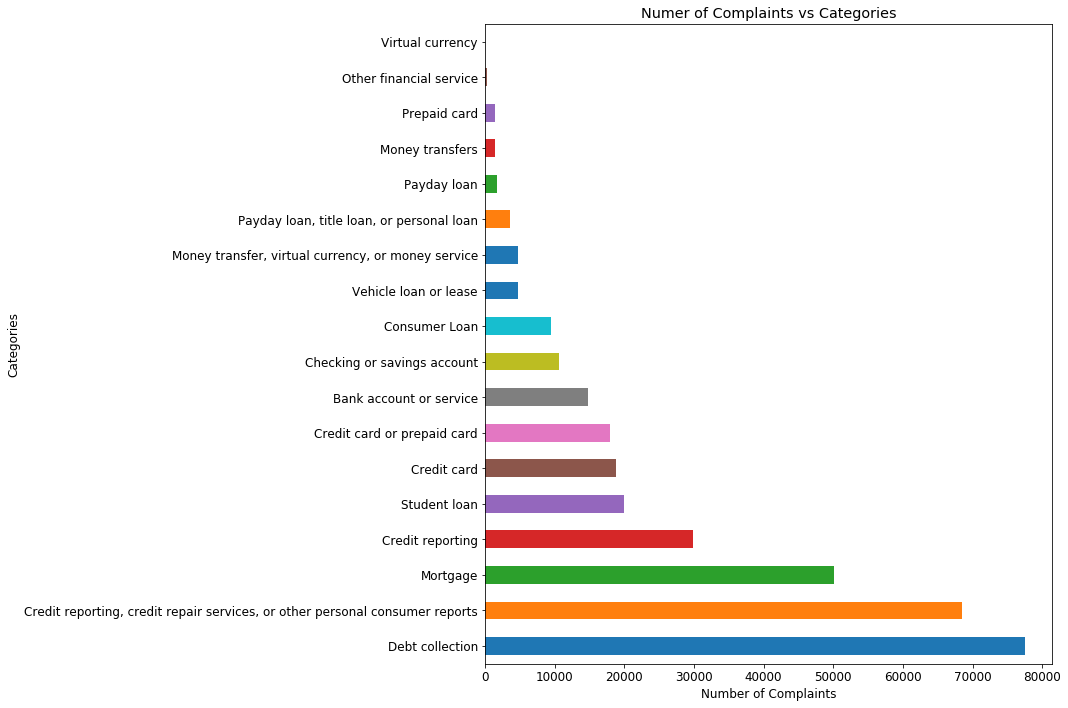

In [23]:
plt.rcParams['figure.figsize']=(15,10)
plt.rcParams.update({'font.size':12})
plt.rcParams.update({'figure.autolayout': True})
_=consumer['Product'].value_counts().plot(kind='barh')
plt.ylabel('Categories')
plt.xlabel('Number of Complaints')
plt.title('Numer of Complaints vs Categories')
plt.savefig('../results/Complaint_Counts_with_titles.png')

C:\Anaconda3\lib\site-packages\matplotlib\figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


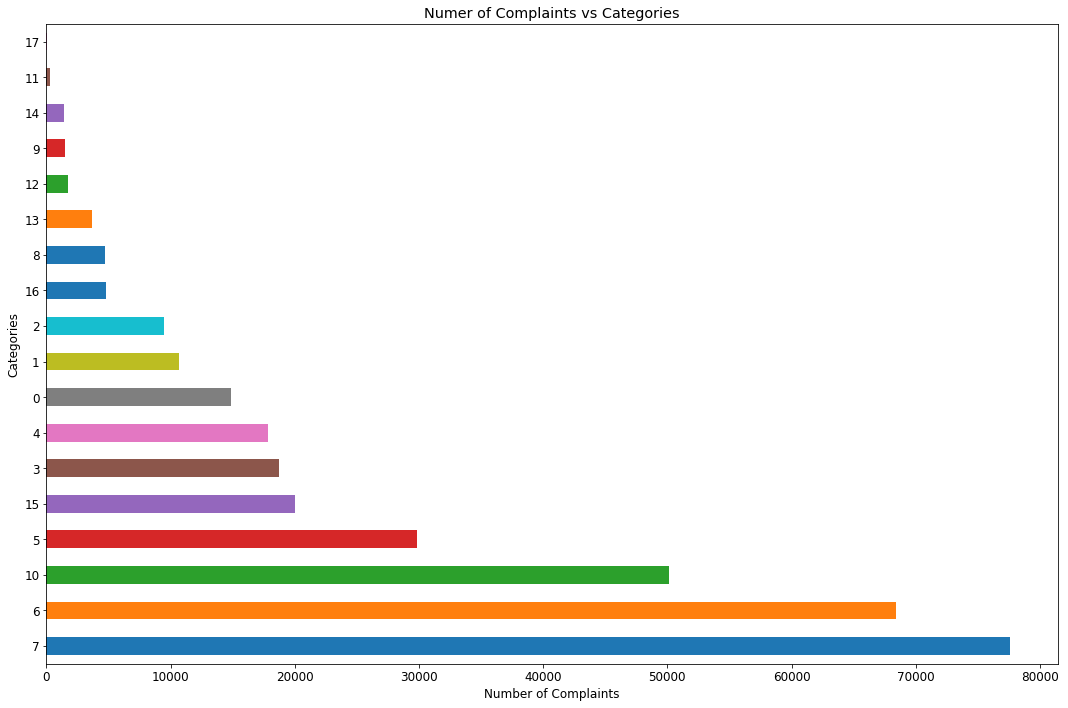

In [24]:
plt.rcParams['figure.figsize']=(15,10)
plt.rcParams.update({'font.size':12})
plt.rcParams.update({'figure.autolayout': True})
_=consumer['Product_id'].value_counts().plot(kind='barh')
plt.ylabel('Categories')
plt.xlabel('Number of Complaints')
plt.title('Numer of Complaints vs Categories')
plt.savefig('../results/Complaint_Counts.png')

## Choosing top 1000 entries of the 5 most common categories 

In [25]:
consumer=pd.concat([consumer[consumer.Product_id==7].iloc[0:1000],consumer[consumer.Product_id==6].iloc[0:1000],
consumer[consumer.Product_id==5].iloc[0:1000],consumer[consumer.Product_id==15].iloc[0:1000],
consumer[consumer.Product_id==10].iloc[0:1000]])

In [26]:
consumer.to_csv('..\data\Consumer_Clean.csv')